<a href="https://colab.research.google.com/github/LeonelOctavio/Actividad2/blob/main/sign_mnlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Cargar los datos del archivo CSV
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [7]:
# Separar las características y las etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

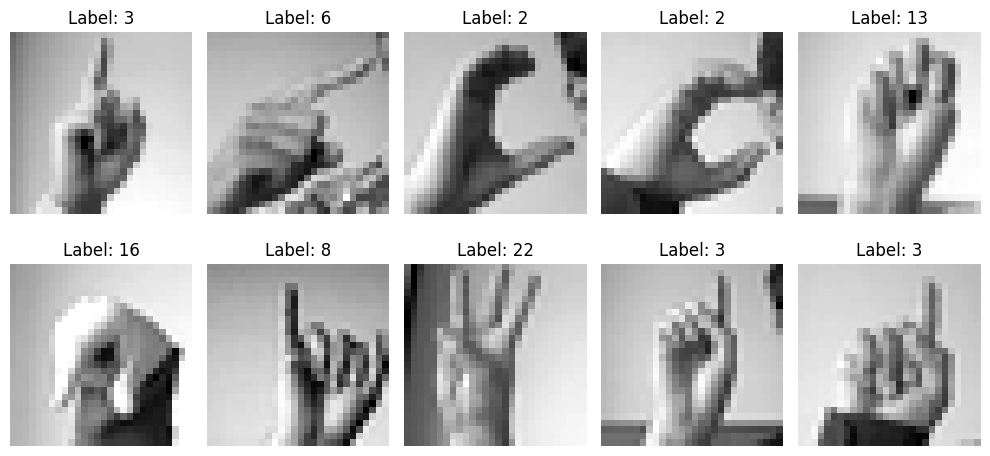

In [8]:
# Visualización de algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Crear etiquetas binarias para clasificador "O vs not-O"
y_train_o = (y_train == 15)  # 15 representa la letra 'O'
y_test_o = (y_test == 15)

In [10]:
# Crear y entrenar el clasificador SGD
sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train_o)

SGDClassifier(random_state=42, tol=1e-05)

In [11]:
# Realizar k-fold cross validation y obtener el accuracy score
accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_o, cv=5, scoring='accuracy')
mean_accuracy = np.mean(accuracy_scores)

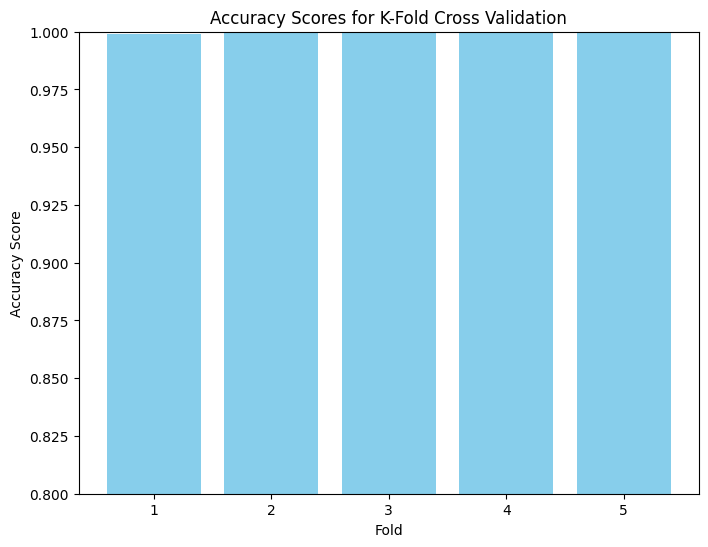

In [12]:
# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), accuracy_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for K-Fold Cross Validation')
plt.ylim([0.8, 1.0])
plt.xticks(range(1, 6))
plt.show()

In [13]:
# Validación cruzada y almacenamiento de predicciones
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_o, cv=5)

In [14]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_train_o, y_train_pred)

In [15]:
# Métricas de rendimiento
precision = precision_score(y_train_o, y_train_pred)
recall = recall_score(y_train_o, y_train_pred)
f1 = f1_score(y_train_o, y_train_pred)

<ipython-input-16-24727f05e45b>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(conf_matrix, cmap=plt.cm.get_cmap('Blues'))


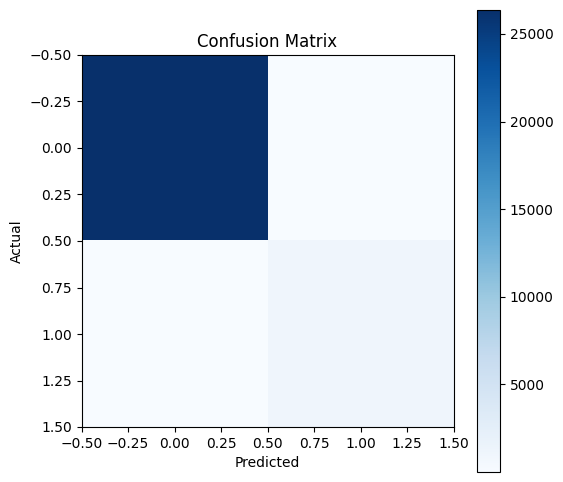

In [16]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Resultados
print("Class:", class_name)
print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Class: O
Accuracy Scores: [0.9989073  1.         0.99963577 0.99981788 0.99963577]
Mean Accuracy: 0.9995993443817156
Precision: 0.9954001839926403
Recall: 0.9944852941176471
F1 Score: 0.9949425287356322
